In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from ts_modelling.simple_experiment import SimpleExp
from argparse import Namespace
import yaml
%matplotlib inline

## Temperature experiment setup:
for model in [Patch_self_supervised, Patch_supervised, DLinear, Naive, Pattern repeating] do:
* if model is not in [naive, pattern repeating]:
    * train model on stockholm temperature
* test model on: 
    * Stockholm 
    * Delsbo 
    * Sundsvall 
    * Jönköping
    * Malmö  

Experiment number: 1/81
Use CPU
supervised head
Trainable parameters:        1476
Total parameters:            1477
Training on data: odd_sine.csv
train 5853
val 780
test 1652
Total training time: 0 minutes 2.1422080993652344 seconds

Trainable parameters:       17376
Total parameters:           18697
Training on data: odd_sine.csv
train 5853
val 780
test 1652
Total training time: 0 minutes 3.8902060985565186 seconds

Trainable parameters:       18697
Total parameters:           18697
Training on data: odd_sine.csv
train 5853
val 780
test 1652
Total training time: 0 minutes 1.190669059753418 seconds

test 1652

test 1652

test 1652

test 1652

test 1652
----------
Experiment number: 2/81
Use CPU
supervised head

Trainable parameters:        1476
Total parameters:            1477
Training on data: odd_sine.csv
train 5853
val 780
test 1652
Total training time: 0 minutes 1.4387929439544678 seconds

Trainable parameters:       17376
Total parameters:           18697
Training on data: even_

KeyboardInterrupt: 

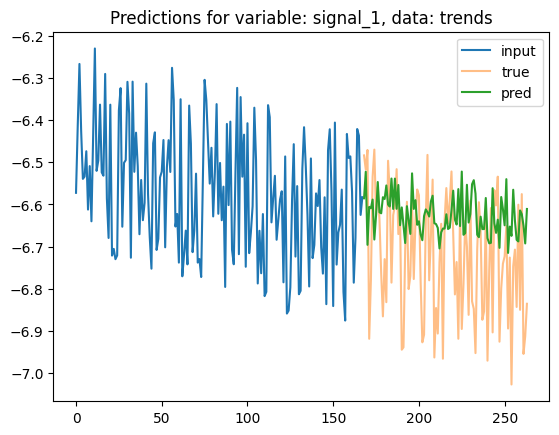

In [3]:
import time
with open('temp_exp_args.yaml', 'r') as file:
    args_dict = yaml.safe_load(file)
args = Namespace(**args_dict)

exp_time_start = time.time()
model_names = {'patch_self_sv': 'PatchTST', 
               'patch_self': 'PatchTST',
               'dlinear': 'DLinear',
               'naive': 'Naive', 
               'pattern_repeating': 'PatternRepeating', 
               'daily_repeating': 'DailyRepeating',
               }

training_times = {}
train_data = ['stockholm']
test_data = ['stockholm', 'delsbo', 'sundsvall', 'jonkoping', 'malmo']
for model_name in model_names:
    model_time = time.time()
    for td in train_data:
        args.model_name = f'{model_name}_{td}'
        args.data_path = f'{td}.csv'
        args.model = model_names[model_name]
        exp = SimpleExp(args)
        
        if args.model_name == 'patch_self_sv':
            exp.pretrain_model()
            exp.train_predict_head()
            exp.finetune_model()
        elif args.model_name in ['patch_self', 'dlinear']:
            exp.args.pretrain_data = {'supervised': 0}
            exp.args.train_head = {'supervised': 0}
            exp.args.finetune_data = {exp.args.data_path: exp.args.train_epochs}
            exp.train()
            
        training_times[model_name] = time.time() - model_time
        for test in test_data:
            exp.test(f'{test}.csv')
        exp.plot_preds(show=False)

pd.DataFrame(training_times).to_csv('./test_results/temperature_training_times.csv')     
total_time = time.time()-exp_time_start
minutes = total_time // 60
seconds = total_time % 60

print(f'Total experiment time: {int(minutes)} minutes {seconds} seconds')

In [8]:
args.model = 'DLinear'
args.model_name = 'DLinear'
exp = SimpleExp(args)
exp.train()

Use CPU
supervised head
Trainable parameters:      129408
Total parameters:          129408
Training on data: combination.csv
train 5589
val 684
test 1556
Validation loss decreased (inf --> 0.486942).  Saving model ...
Updating learning rate to 9.691565184256078e-05
Validation loss decreased (0.486942 --> 0.109783).  Saving model ...
Updating learning rate to 7.482616436387373e-05
Validation loss decreased (0.109783 --> 0.092112).  Saving model ...
Updating learning rate to 4.112033224946971e-05
EarlyStopping counter: 1 out of 15
Updating learning rate to 1.1569488944275967e-05
Validation loss decreased (0.092112 --> 0.092042).  Saving model ...
Updating learning rate to 8.024518333630251e-10
Total training time: 0 minutes 3.921025037765503 seconds


In [11]:
exp.test('combination.csv')

test 1556
Testing DLinear on combination.csv


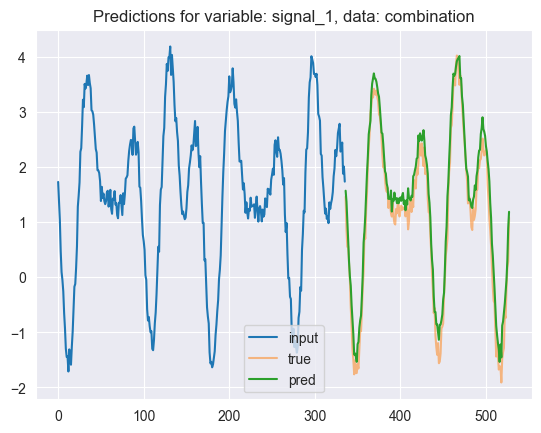

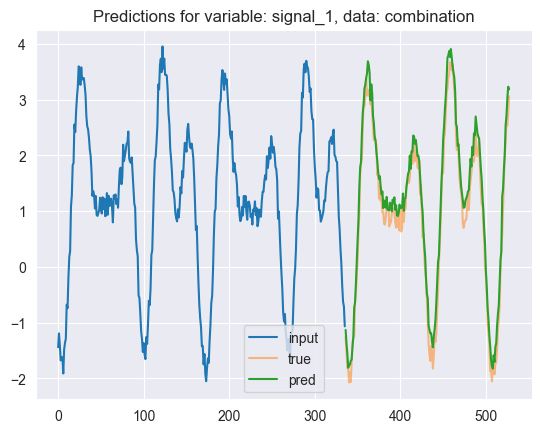

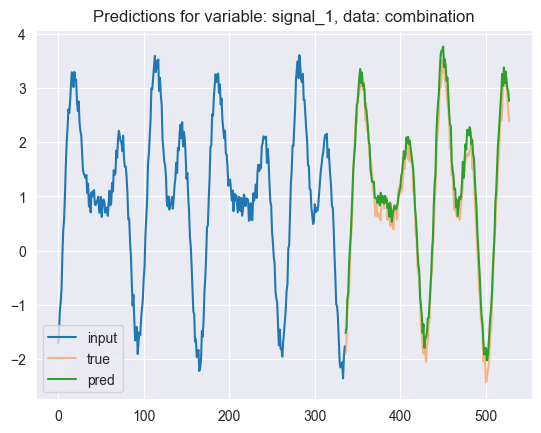

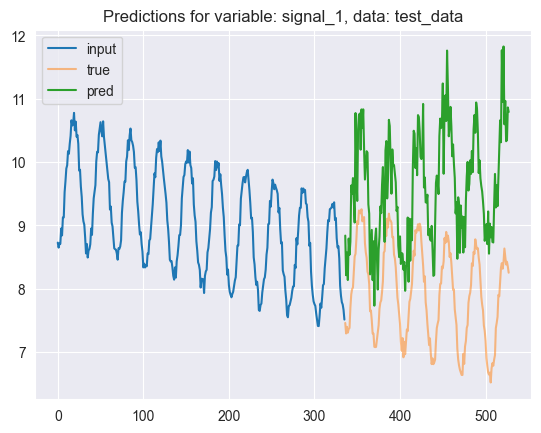

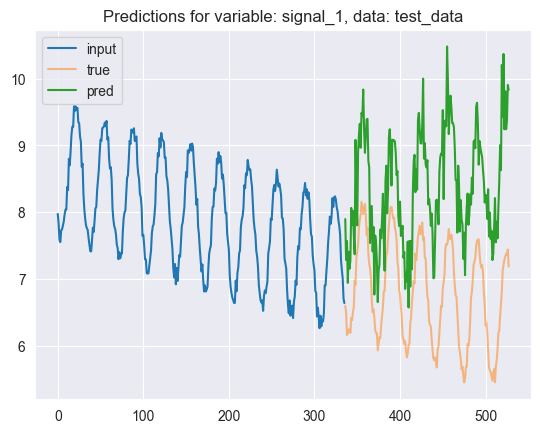

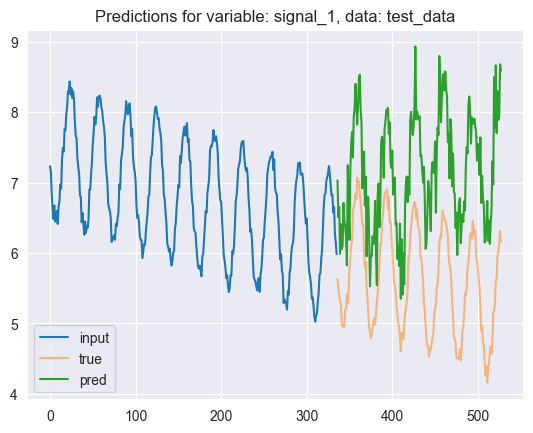

In [12]:
exp.plot_preds()

In [5]:
import pandas as pd
df = pd.read_csv('./test_results/metrics.csv')
df

,model_name,pretrain_data,train_head_data,finetune_data,test_data,mae,mse,rmse,mape,mspe,RSE
0,PTST_pt-odd_sine_ft-odd_sine,odd_sine-1,odd_sine-1,odd_sine-1,odd_sine,0.886850,1.185746,1.088920,6.070765,3294.41400,1.067823
1,PTST_pt-odd_sine_ft-odd_sine,odd_sine-1,odd_sine-1,odd_sine-1,even_sine,0.920424,1.283475,1.132905,3.226424,198.36586,1.124267
2,PTST_pt-odd_sine_ft-even_sine,odd_sine-1,even_sine-1,even_sine-1,odd_sine,0.905887,1.247310,1.116830,6.064373,3495.89200,1.095192
3,PTST_pt-odd_sine_ft-even_sine,odd_sine-1,even_sine-1,even_sine-1,even_sine,0.854129,1.121322,1.058925,2.937047,170.28098,1.050851
4,PTST_pt-even_sine_ft-odd_sine,even_sine-1,odd_sine-1,odd_sine-1,odd_sine,0.864889,1.126819,1.061517,5.947396,3240.23320,1.040951
5,PTST_pt-even_sine_ft-odd_sine,even_sine-1,odd_sine-1,odd_sine-1,even_sine,0.918734,1.281816,1.132173,3.208324,198.39885,1.123540
6,PTST_pt-even_sine_ft-even_sine,even_sine-1,even_sine-1,even_sine-1,odd_sine,0.906754,1.249866,1.117974,6.344046,3850.87230,1.096314
7,PTST_pt-even_sine_ft-even_sine,even_sine-1,even_sine-1,even_sine-1,even_sine,0.851091,1.113350,1.055154,3.019632,183.32370,1.047109


In [6]:
df.groupby('model_name')['mse'].mean().sort_values()

Use CPU
supervised head
Trainable parameters:      106508
Total parameters:          106509
Training on data: even_sine.csv
train 5606
val 686
test 1561
Validation loss decreased (inf --> 0.789066).  Saving model ...
Updating learning rate to 2.8083122651248297e-05
Total training time: 0 minutes 4.100135087966919 seconds
Trainable parameters:      712896
Total parameters:          817857
Training on data: even_sine.csv
train 5606
val 686
test 1561
Validation loss decreased (inf --> 0.032377).  Saving model ...
Updating learning rate to 2.8083122651248297e-05
Total training time: 0 minutes 2.50844407081604 seconds
Trainable parameters:      817857
Total parameters:          817857
Training on data: even_sine.csv
train 5606
val 686
test 1561
Validation loss decreased (inf --> 0.030351).  Saving model ...
Updating learning rate to 2.8083122651248297e-05
Total training time: 0 minutes 4.934921979904175 seconds


In [8]:
import time
exp_time_start = time.time()

data_list = ['odd_sine', 'even_sine', 'trends']

train_epoch_list = [1, 3, 5, 10]

for train_epochs in train_epoch_list:
    for train_data in data_list:
        exp = SimpleExp(args)
        model_name = f'PTST_train_only-{train_data}-{train_epochs}'
        exp.change_model_name(model_name)
        
        print()
        print(f'Training: {model_name} on data: {train_data} for {train_epochs} epochs')
        exp.train()

        for test_data_name in data_list:
            print()
            print(f'Testing {model_name} on data: {test_data_name}')
            args.test_data = test_data_name+'.csv'
            exp.test()


        args.test_data = 'combination.csv'
        print()
        print(f'Testing {model_name} on data: combination.csv')
        exp.test()

        args.test_data = 'joker.csv'
        print()
        print(f'Testing {model_name} on data: joker.csv')
        exp.test()

        print(10*'-')

        exp.plot_preds(show=False)

total_time = time.time()-exp_time_start
minutes = total_time // 60
seconds = total_time % 60

print(f'Total experiment time: {int(minutes)} minutes {seconds} seconds')

test 1561
